# Analyzing Freddie Mac Single Family Loans

## Abstract
The Federal Home Loan Mortgage Corporation (FHLMC), known as Freddie Mac, is a public government-sponsored enterprise which was created to expand the secondary market for mortgages in the United States. Freddie Mac buys mortgages on the secondary market, pools them, and sells them as a mortgage-backed security to investors on the open market. This secondary mortgage market increases the supply of money available for mortgage lending and increases the money available for new home purchases.
<br>
<br>
For example, when your typical American family of 4 purchases a home, they need to exchange money with the seller. More often than not, the family does not have [650,000 USD](https://la.curbed.com/2018/7/24/17608186/los-angeles-median-home-price-june-core-logic) on-hand to pay to the seller. However, they are able to afford by taking out a loan from a bank and making monthly payments over 15-30 years. The amount of each monthly payment is [calculated](https://www.calculator.net/finance-calculator.html) by the loan length, amount, and the interest rate. From a top-down view, the interest rate on that loan is mainly influenced by The Federal Reserve's manipulation of the [Federal Funds Rate](https://en.wikipedia.org/wiki/Federal_funds_rate) (but we won't cover that now) & a combination of other factors, including but not limited to: the individual consumer's credit score, home price & location, down payment, and the loan & interest rate types. Now back to the bank, whom has agreed to lend the family a specified amount for a specified period and now finds itself without that money in its reserves. If a bank doesn't have money to lend, how can it function? Enter Freddie Mac who then buys the rights to the family's loan, thereby giving the bank the capital it needs. Freddie Mac does this thousands & thousands of times, pooling the mortgages to then sell to investors. This way, the family can make monthly payments and live in their home and the bank can continue to have capital to lend. Broadly speaking, you could say investors in these pooled investments are the actual owners of the family's loan, NOT the bank! Much like the equity market, investors in mortgage-backed-securities can see the value of their investment rise or fall. These mortgage "pools" one can invest in can be grouped by credit quality, geographic location, value, etc. If for example, there is a local recession in Dallas, TX. Homeowners lose work & cannot make their monthly loan payments. The investor whom bought the Dallas-pool will see the value of their investment fall. Likewise, if the real-estate market & general economy in Charleston, SC is booming, the pooled-South Carolina MBS portfolio will appreciate in value. I'd like to add in there are many other reasons for an increase/decrease in value and my example should be considered limited. Please see [here](http://people.stern.nyu.edu/igiddy/ABS/absmbs.pdf) for a further intro.

## The Motivation
Whether as an investor or as a lending institution, it is prudent to conduct proper diligence on the underlying securities within the financial product. ____________INCOMPLETE___________

## The Data
At the direction of its regulator, the Federal Housing Finance Agency (FHFA), Freddie Mac has made the Single Family Loan-Level Dataset (the "Dataset") available as part of a larger effort to increase transparency and help investors build mre accurate credit performance models in support of ongoing and future credit risk-sharing transactions. The Dataset includes: <br>
1. Loan-level origination, monthly loan performance, and actual loss data on a portion of the fully amortizing 30-year fixed-rate Single Family mortgages that Freddie Mac acquired with origination dates from 1999 to the Origination Cutoff Date. 
2. Loan-level origination, monthly loan performance, and actual loss data on a portion of the fully amortizing 15- and 20-year fixed-rate Single Family mortgages that Freddie Mac acquired with origination dates from January 1, 2005, to the Origination Cutoff Date. 
Loan performance information in the Dataset includes the monthly loan balance, delinquency status and certain information up to and including the earliest of the following termination events: <br>
    a. Prepaid or Matured (voluntary Payoff) <br>
    b. Foreclosure Alternative Group (Short Sale, Third Party Sale, Charge Off or Note Sale) <br>
    c. Repurchase prior to Property Disposition. <br>
    d. REO Disposition <br>

### Single Family Loan-Level Dataset Sample
Freddie Mac has created a smaller dataset which is a simple random sample of 50,000 loans selected from each full vintage year and a proportionate nubmer of loans from each partial vintage year of the full Single Family Loan-Level Dataset. Each vintage year has one origination data file and one corresponding monthly performance data file, containing the same loan-level data fields as those included in the full Dataset.

## Hypothesis
The outcome of housing loan defaults can be statistically modeled and predicted as a function of financial factors, specifically interest Rate and consumer credit history.  ______INCOMPLETE______

## Dataset Characteristics

#### Time period: 2012 to 2016
#### Number of loans:
#### Features:

# Initial Data Import & Treatment
Origination and performance data must be downloaded individually by year from the Freddie Mac website. <br>
<br>
Format as follows: <br>
sample_orig_YYYY.txt --> origination data <br>
sample_svcg_YYYY.txt --> monthly performance data <br>
<br>
Both origination and performance files share the common "loan sequence number" which serves as the unique loan identifier. The "loan sequence number" includes the year and quarter (Q1, Q2, etc) of loan origination. The performance file shows monthly performance for each loan, thus there are multiple rows (month1, month2, etc) corresponding to each "loan sequence number". There are multiple null values and data-types within the datasets, and the data is considered "living", meaning it is subject to change as Freddie Mac receives & updates to their housing loan profiles.

In [189]:
# Import Modules:
import time
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm

# Aesthetics.
%matplotlib inline

# Suppressing "Future Warning"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [54]:
# Load raw files.
orig2012 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_2012.txt', sep='|', header=None)
orig2013 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_2013.txt', sep='|', header=None)
orig2014 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_2014.txt', sep='|', header=None)
orig2015 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_2015.txt', sep='|', header=None)
orig2016 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_2016.txt', sep='|', header=None)

perf2012 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_2012.txt', sep='|', header=None, low_memory=False)
perf2013 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_2013.txt', sep='|', header=None, low_memory=False)
perf2014 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_2014.txt', sep='|', header=None, low_memory=False)
perf2015 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_2015.txt', sep='|', header=None, low_memory=False)
perf2016 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_2016.txt', sep='|', header=None, low_memory=False)

In [55]:
# Setting header names & apply.
orig_cols = ['creditScore', 'firstPaymentDate', 'firstTimeHomebuyerFlag', 'maturityDate',
                   'metroArea', 'miPercentage', 'numberOfUnits',
                   'occupancyStatus', 'cltvRatio', 'dtiRatio', 'upb',
                   'ltvRatio', 'interestRate', 'channel', 'ppmFlag', 'productType',
                   'propertyState', 'propertyType', 'postalCode', 'lsn',
                   'loanPurpose', 'originalLoanTerm', 'numberOfBorrowers', 'sellerName',
                   'servicerName', 'superConformingFlag'] # 'pre-HarpLoanSequenceNumber'

perf_cols = ['lsn', 'monthlyReportingPeriod', 'currentActualUpb',
                 'dlq', 'loanAge', 'remainMthsToMaturity', 'repurchaseFlag',
                 'modificationFlag', 'zeroBalCode', 'zeroBalEffDate', 'currentIntRate',
                 'curDeferredUpb', 'ddlpi', 'miRecov', 'netSalesProceeds', 'nonMiRecov',
                 'expenses', 'legalCosts', 'maintPreservationCosts', 'taxesInsurance',
                 'miscExpenses', 'actualLossCalc', 'modificationCost',
                 'stepModificationFlag', 'deferredPaymentModification']

orig2012.columns = orig_cols
orig2013.columns = orig_cols
orig2014.columns = orig_cols
orig2015.columns = orig_cols
orig2016.columns = orig_cols

perf2012.columns = perf_cols
perf2013.columns = perf_cols
perf2014.columns = perf_cols
perf2015.columns = perf_cols
perf2016.columns = perf_cols

In [56]:
# Merge origination files.
frames_orig = [orig2012, orig2013, orig2014, orig2015, orig2016]
orig_combined = pd.concat(frames_orig)
print(orig_combined.shape)
orig_combined.head()

(250000, 26)


,creditScore,firstPaymentDate,firstTimeHomebuyerFlag,maturityDate,metroArea,miPercentage,numberOfUnits,occupancyStatus,cltvRatio,dtiRatio,...,propertyState,propertyType,postalCode,lsn,loanPurpose,originalLoanTerm,numberOfBorrowers,sellerName,servicerName,superConformingFlag
0,814,201203,9,204202,49420.0,0,1,P,57,36,...,WA,SF,98900,F112Q1000057,C,360,2,Other sellers,Other servicers,NaN
1,745,201204,9,204203,NaN,0,1,S,69,31,...,NH,SF,3200,F112Q1000089,P,360,2,Other sellers,"PNCBANK,NATL",NaN
2,707,201203,9,204202,47260.0,0,1,P,80,36,...,VA,SF,23000,F112Q1000137,C,360,2,Other sellers,Other servicers,NaN
3,712,201203,9,204202,31540.0,0,1,P,59,21,...,WI,SF,53500,F112Q1000154,N,360,2,Other sellers,Other servicers,NaN
4,783,201203,9,204202,21060.0,0,1,I,75,25,...,KY,SF,42700,F112Q1000162,N,360,2,Other sellers,Other servicers,NaN


In [57]:
# Create 'year' column within the merged origination file.
# The loan sequence number 'lsn' is formatted F1YYQnXXXXXX,
# where F1 refers to the product 'Fixed Rate Mortgage',
# YYQn refers to origination year and quarter.

orig_combined['year'] = ['19' + x if x == '99' else '20' + x
                         for x in (orig_combined['lsn'].apply(lambda x: x[2:4]))]
orig_combined.tail()

,creditScore,firstPaymentDate,firstTimeHomebuyerFlag,maturityDate,metroArea,miPercentage,numberOfUnits,occupancyStatus,cltvRatio,dtiRatio,...,propertyType,postalCode,lsn,loanPurpose,originalLoanTerm,numberOfBorrowers,sellerName,servicerName,superConformingFlag,year
49995,808,201701,N,204612,21780.0,0,1,P,80,21,...,SF,47700,F116Q4434422,P,360,1,Other sellers,Other servicers,NaN,2016
49996,721,201701,9,204612,35614.0,0,2,P,55,49,...,SF,10400,F116Q4434529,C,360,1,"JPMORGANCHASEBANK,NA","JPMORGANCHASEBANK,NA",NaN,2016
49997,716,201710,9,204709,38060.0,0,1,P,66,35,...,PU,85100,F116Q4434568,N,360,2,Other sellers,Other servicers,NaN,2016
49998,791,201701,9,204612,37964.0,0,1,I,72,39,...,SF,19000,F116Q4434582,P,360,2,Other sellers,Other servicers,NaN,2016
49999,721,201710,9,204709,39340.0,25,1,P,88,40,...,SF,84000,F116Q4434621,N,360,2,Other sellers,Other servicers,NaN,2016


In [58]:
# Merge performance files.
frames_perf = [perf2012, perf2013, perf2014, perf2015, perf2016]
perf_combined = pd.concat(frames_perf)
print(perf_combined.shape)
perf_combined.head()

(8727988, 25)


,lsn,monthlyReportingPeriod,currentActualUpb,dlq,loanAge,remainMthsToMaturity,repurchaseFlag,modificationFlag,zeroBalCode,zeroBalEffDate,...,nonMiRecov,expenses,legalCosts,maintPreservationCosts,taxesInsurance,miscExpenses,actualLossCalc,modificationCost,stepModificationFlag,deferredPaymentModification
0,F112Q1000057,201202,103000.0,0,0,360,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,F112Q1000057,201203,103000.0,0,1,359,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2,F112Q1000057,201204,103000.0,0,2,358,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
3,F112Q1000057,201205,102000.0,0,3,357,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
4,F112Q1000057,201206,102000.0,0,4,356,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [59]:
# Check deliquency values, we will have to remove whitespace for '0' later.
perf_combined['dlq'].value_counts()

0     7857555
0      830116
1       25190
2        4436
1        2774
3        1793
4        1093
5         873
6         602
7         465
2         427
8         372
9         325
10        263
11        211
12        190
3         153
13        152
14        117
R         101
15         85
16         78
17         67
4          65
18         51
5          43
19         39
20         32
21         29
25         26
       ...   
8          15
27         13
10         12
9          11
28         10
30         10
29          9
32          6
31          6
33          5
35          4
11          4
36          4
34          4
37          3
12          3
41          2
XX          2
39          2
40          2
38          2
13          2
47          1
46          1
43          1
45          1
44          1
48          1
14          1
42          1
Name: dlq, Length: 66, dtype: int64

In [60]:
# Delinquency Status values where XX = Unknown, R = REO Acquistion
perf_combined['dlq'] = [999 if x == 'R' else x for x in (perf_combined['dlq'].apply(lambda x: x))]
perf_combined['dlq'] = [0 if x == 'XX' else x for x in (perf_combined['dlq'].apply(lambda x: x))]

In [61]:
# Not delinquent ie: '0' adds up including the 2 'XX's.
perf_combined['dlq'].value_counts()

0      7857555
0       830118
1        25190
2         4436
1         2774
3         1793
4         1093
5          873
6          602
7          465
2          427
8          372
9          325
10         263
11         211
12         190
3          153
13         152
14         117
999        101
15          85
16          78
17          67
4           65
18          51
5           43
19          39
20          32
21          29
25          26
        ...   
7           15
8           15
27          13
10          12
9           11
30          10
28          10
29           9
31           6
32           6
33           5
36           4
35           4
34           4
11           4
12           3
37           3
41           2
13           2
40           2
38           2
39           2
14           1
46           1
47           1
48           1
42           1
43           1
45           1
44           1
Name: dlq, Length: 65, dtype: int64

In [62]:
# Combining based on loan sequence number.
orig_combined['is_dlq'] = orig_combined['lsn'].map(
    perf_combined.set_index('lsn')['dlq'].to_dict())
orig_combined.head()

,creditScore,firstPaymentDate,firstTimeHomebuyerFlag,maturityDate,metroArea,miPercentage,numberOfUnits,occupancyStatus,cltvRatio,dtiRatio,...,postalCode,lsn,loanPurpose,originalLoanTerm,numberOfBorrowers,sellerName,servicerName,superConformingFlag,year,is_dlq
0,814,201203,9,204202,49420.0,0,1,P,57,36,...,98900,F112Q1000057,C,360,2,Other sellers,Other servicers,NaN,2012,0
1,745,201204,9,204203,NaN,0,1,S,69,31,...,3200,F112Q1000089,P,360,2,Other sellers,"PNCBANK,NATL",NaN,2012,0
2,707,201203,9,204202,47260.0,0,1,P,80,36,...,23000,F112Q1000137,C,360,2,Other sellers,Other servicers,NaN,2012,0
3,712,201203,9,204202,31540.0,0,1,P,59,21,...,53500,F112Q1000154,N,360,2,Other sellers,Other servicers,NaN,2012,0
4,783,201203,9,204202,21060.0,0,1,I,75,25,...,42700,F112Q1000162,N,360,2,Other sellers,Other servicers,NaN,2012,0


In [63]:
# Renaming dataframe.
merged_df = orig_combined

In [64]:
len(merged_df)

250000

In [65]:
merged_df.columns

Index(['creditScore', 'firstPaymentDate', 'firstTimeHomebuyerFlag',
       'maturityDate', 'metroArea', 'miPercentage', 'numberOfUnits',
       'occupancyStatus', 'cltvRatio', 'dtiRatio', 'upb', 'ltvRatio',
       'interestRate', 'channel', 'ppmFlag', 'productType', 'propertyState',
       'propertyType', 'postalCode', 'lsn', 'loanPurpose', 'originalLoanTerm',
       'numberOfBorrowers', 'sellerName', 'servicerName',
       'superConformingFlag', 'year', 'is_dlq'],
      dtype='object')

In [66]:
# Second check for nulls.
print('nulls before:', merged_df['is_dlq'].isnull().sum())

# Fill NaNs.
merged_df['is_dlq'] = merged_df['is_dlq'].fillna(0)
print('nulls after:', merged_df['is_dlq'].isnull().sum())

nulls before: 4
nulls after: 0


In [67]:
# Let's come back to the whitespace.
# Per the Freddie Mac manual on delinquency status:
#    0 = Current, or less than 30 days past due.
#    Space (3) = Unavailable
#    XX = Unknown

merged_df.is_dlq.value_counts()

0      197881
0       49480
1        1136
2         386
1         290
3         188
2         142
4          65
999        60
3          55
5          52
6          40
7          31
8          20
10         19
11         17
9          17
12         13
5          11
4          11
13         11
14          9
16          9
19          6
6           6
20          5
25          5
17          5
18          4
15          4
7           3
27          2
8           2
29          2
21          2
10          2
30          1
12          1
14          1
37          1
26          1
41          1
33          1
48          1
32          1
Name: is_dlq, dtype: int64

In [68]:
# We will assume 'unavailable' loan delinquency status as not-delinquent.

# Change dtype for 'dlq'.
merged_df['is_dlq'] = merged_df['is_dlq'].astype('int64')
merged_df.is_dlq.value_counts()

0      247361
1        1426
2         528
3         243
4          76
5          63
999        60
6          46
7          34
8          22
10         21
9          17
11         17
12         14
13         11
14         10
16          9
19          6
17          5
20          5
25          5
15          4
18          4
27          2
21          2
29          2
48          1
26          1
30          1
32          1
33          1
37          1
41          1
Name: is_dlq, dtype: int64

In [69]:
# Creating the binary feature for delinquent loan. 
merged_df['is_dlq'] = merged_df['is_dlq'].apply(lambda x: 1 if x >= 1 else 0)
merged_df.is_dlq.value_counts()

0    247361
1      2639
Name: is_dlq, dtype: int64

In [70]:
len(merged_df)

250000

In [71]:
# Renaming dataframe.
df1 = merged_df
print(df1.columns)
df1.tail()

Index(['creditScore', 'firstPaymentDate', 'firstTimeHomebuyerFlag',
       'maturityDate', 'metroArea', 'miPercentage', 'numberOfUnits',
       'occupancyStatus', 'cltvRatio', 'dtiRatio', 'upb', 'ltvRatio',
       'interestRate', 'channel', 'ppmFlag', 'productType', 'propertyState',
       'propertyType', 'postalCode', 'lsn', 'loanPurpose', 'originalLoanTerm',
       'numberOfBorrowers', 'sellerName', 'servicerName',
       'superConformingFlag', 'year', 'is_dlq'],
      dtype='object')


,creditScore,firstPaymentDate,firstTimeHomebuyerFlag,maturityDate,metroArea,miPercentage,numberOfUnits,occupancyStatus,cltvRatio,dtiRatio,...,postalCode,lsn,loanPurpose,originalLoanTerm,numberOfBorrowers,sellerName,servicerName,superConformingFlag,year,is_dlq
49995,808,201701,N,204612,21780.0,0,1,P,80,21,...,47700,F116Q4434422,P,360,1,Other sellers,Other servicers,NaN,2016,0
49996,721,201701,9,204612,35614.0,0,2,P,55,49,...,10400,F116Q4434529,C,360,1,"JPMORGANCHASEBANK,NA","JPMORGANCHASEBANK,NA",NaN,2016,0
49997,716,201710,9,204709,38060.0,0,1,P,66,35,...,85100,F116Q4434568,N,360,2,Other sellers,Other servicers,NaN,2016,0
49998,791,201701,9,204612,37964.0,0,1,I,72,39,...,19000,F116Q4434582,P,360,2,Other sellers,Other servicers,NaN,2016,0
49999,721,201710,9,204709,39340.0,25,1,P,88,40,...,84000,F116Q4434621,N,360,2,Other sellers,Other servicers,NaN,2016,0


In [72]:
# Check for nulls.
df1.isnull().sum()

creditScore                    0
firstPaymentDate               0
firstTimeHomebuyerFlag         0
maturityDate                   0
metroArea                  26492
miPercentage                   0
numberOfUnits                  0
occupancyStatus                0
cltvRatio                      0
dtiRatio                       0
upb                            0
ltvRatio                       0
interestRate                   0
channel                        0
ppmFlag                       95
productType                    0
propertyState                  0
propertyType                   0
postalCode                     0
lsn                            0
loanPurpose                    0
originalLoanTerm               0
numberOfBorrowers              0
sellerName                     0
servicerName                   0
superConformingFlag       239659
year                           0
is_dlq                         0
dtype: int64

In [73]:
df1.ppmFlag.value_counts()

N    249905
Name: ppmFlag, dtype: int64

In [74]:
df1.superConformingFlag.value_counts()

Y    10341
Name: superConformingFlag, dtype: int64

In [75]:
# Fill remaining nulls.
df1['metroArea'] = df1['metroArea'].fillna(0)
df1['ppmFlag'] = df1['ppmFlag'].fillna('Y')
df1['superConformingFlag'] = df1['superConformingFlag'].fillna('N')

df1.isnull().sum()

creditScore               0
firstPaymentDate          0
firstTimeHomebuyerFlag    0
maturityDate              0
metroArea                 0
miPercentage              0
numberOfUnits             0
occupancyStatus           0
cltvRatio                 0
dtiRatio                  0
upb                       0
ltvRatio                  0
interestRate              0
channel                   0
ppmFlag                   0
productType               0
propertyState             0
propertyType              0
postalCode                0
lsn                       0
loanPurpose               0
originalLoanTerm          0
numberOfBorrowers         0
sellerName                0
servicerName              0
superConformingFlag       0
year                      0
is_dlq                    0
dtype: int64

In [76]:
df1.productType.value_counts()

FRM    250000
Name: productType, dtype: int64

In [77]:
# Removing cols.
df1 = df1.drop(['productType', 'metroArea', 'postalCode'], axis=1)
df1.columns

Index(['creditScore', 'firstPaymentDate', 'firstTimeHomebuyerFlag',
       'maturityDate', 'miPercentage', 'numberOfUnits', 'occupancyStatus',
       'cltvRatio', 'dtiRatio', 'upb', 'ltvRatio', 'interestRate', 'channel',
       'ppmFlag', 'propertyState', 'propertyType', 'lsn', 'loanPurpose',
       'originalLoanTerm', 'numberOfBorrowers', 'sellerName', 'servicerName',
       'superConformingFlag', 'year', 'is_dlq'],
      dtype='object')

In [78]:
# Renaming dataframe.
df2 = df1

In [79]:
# Reordering columns, assigning variables for each column.
lsn_var = df2['lsn']
is_dlq_var = df2['is_dlq']
creditScore_var = df2['creditScore']
interestRate_var = df2['interestRate']
ltvRatio_var = df2['ltvRatio']
dtiRatio_var = df2['dtiRatio']
cltvRatio_var = df2['cltvRatio']
upb_var = df2['upb']
miPercentage_var = df2['miPercentage']
loanPurpose_var = df2['loanPurpose']
numberOfUnits_var = df2['numberOfUnits']
occupancyStatus_var = df2['occupancyStatus']
numberOfBorrowers_var = df2['numberOfBorrowers']
firstTimeHomebuyerFlag_var = df2['firstTimeHomebuyerFlag']
superConformingFlag_var = df2['superConformingFlag']
ppmFlag_var = df2['ppmFlag']
propertyState_var = df2['propertyState']
propertyType_var = df2['propertyType']
channel_var = df2['channel']
sellerName_var = df2['sellerName']
servicerName_var = df2['servicerName']
originalLoanTerm_var = df2['originalLoanTerm']
maturityDate_var = df2['maturityDate']
firstPaymentDate_var = df2['firstPaymentDate']
year_var = df2['year']

In [80]:
# Remove columns then add back in specified order.
df2.drop(['lsn', 'is_dlq', 'creditScore', 'interestRate', 'ltvRatio',
          'dtiRatio', 'cltvRatio', 'upb', 'miPercentage', 'loanPurpose',
          'numberOfUnits', 'occupancyStatus', 'numberOfBorrowers',
          'firstTimeHomebuyerFlag', 'superConformingFlag', 'ppmFlag',
          'propertyState', 'propertyType', 'channel', 'sellerName',
          'servicerName', 'originalLoanTerm', 'maturityDate',
          'firstPaymentDate', 'year'], axis=1, inplace=True)

# Reorder & rename.
df2.insert(0, 'lsn', lsn_var)
df2.insert(1, 'dlq', is_dlq_var)
df2.insert(2, 'credit_score', creditScore_var)
df2.insert(3, 'int_rate', interestRate_var)
df2.insert(4, 'ltv_ratio', ltvRatio_var)
df2.insert(5, 'dti_ratio', dtiRatio_var)
df2.insert(6, 'cltv_ratio', cltvRatio_var)
df2.insert(7, 'unpaid_princ_bal', upb_var)
df2.insert(8, 'mortgage_insurance_pctg', miPercentage_var)
df2.insert(9, 'loan_purpose', loanPurpose_var)
df2.insert(10, 'no_of_units', numberOfUnits_var)
df2.insert(11, 'occupancy_status', occupancyStatus_var)
df2.insert(12, 'no_of_borrowers', numberOfBorrowers_var)
df2.insert(13, 'first_home_flag', firstTimeHomebuyerFlag_var)
df2.insert(14, 'super_conform_flag', superConformingFlag_var)
df2.insert(15, 'ppm_flag', ppmFlag_var)
df2.insert(16, 'state', propertyState_var)
df2.insert(17, 'channel', channel_var)
df2.insert(18, 'seller', sellerName_var)
df2.insert(19, 'servicer', servicerName_var)
df2.insert(20, 'loan_term', originalLoanTerm_var)
df2.insert(21, 'maturity_date', maturityDate_var)
df2.insert(22, 'first_pmt_date', firstPaymentDate_var)
df2.insert(23, 'year', year_var)

# View.
print(df2.columns)
print(df2.shape)

Index(['lsn', 'dlq', 'credit_score', 'int_rate', 'ltv_ratio', 'dti_ratio',
       'cltv_ratio', 'unpaid_princ_bal', 'mortgage_insurance_pctg',
       'loan_purpose', 'no_of_units', 'occupancy_status', 'no_of_borrowers',
       'first_home_flag', 'super_conform_flag', 'ppm_flag', 'state', 'channel',
       'seller', 'servicer', 'loan_term', 'maturity_date', 'first_pmt_date',
       'year'],
      dtype='object')
(250000, 24)


In [81]:
# Change dtypes.
df2[['loan_term', 'maturity_date', 'first_pmt_date']] = df2[[
'loan_term', 'maturity_date', 'first_pmt_date'
]].astype('object')

# View.
df2.dtypes

lsn                         object
dlq                          int64
credit_score                 int64
int_rate                   float64
ltv_ratio                    int64
dti_ratio                    int64
cltv_ratio                   int64
unpaid_princ_bal             int64
mortgage_insurance_pctg      int64
loan_purpose                object
no_of_units                  int64
occupancy_status            object
no_of_borrowers              int64
first_home_flag             object
super_conform_flag          object
ppm_flag                    object
state                       object
channel                     object
seller                      object
servicer                    object
loan_term                   object
maturity_date               object
first_pmt_date              object
year                        object
dtype: object

In [107]:
# Viewing missing/unavailable ratios per specified loan-sequence number.

In [83]:
#print(df2.credit_score.value_counts())
df2.loc[df2['credit_score'] == 9999]

,lsn,dlq,credit_score,int_rate,ltv_ratio,dti_ratio,cltv_ratio,unpaid_princ_bal,mortgage_insurance_pctg,loan_purpose,...,super_conform_flag,ppm_flag,state,channel,seller,servicer,loan_term,maturity_date,first_pmt_date,year
20021,F113Q2240889,0,9999,3.500,60,23,60,337000,0,P,...,N,N,NJ,R,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",360,204307,201308,2013
30996,F113Q3367143,0,9999,4.750,80,26,80,189000,0,P,...,N,N,SC,R,"JPMORGANCHASEBANK,NA","JPMORGANCHASEBANK,NA",360,204310,201311,2013
47229,F113Q4171521,0,9999,3.310,75,36,75,268000,0,P,...,N,N,TX,R,PHHMTGECORP,NEWRESIDENTIALMTGELL,180,202811,201312,2013
42751,F114Q4110544,0,9999,4.750,95,32,95,164000,30,P,...,N,N,DE,R,Other sellers,Other servicers,360,204411,201412,2014
48915,F114Q4238219,0,9999,4.375,54,20,54,89000,0,P,...,N,N,UT,C,PHHMTGECORP,PINGORALOANSERVICING,360,204412,201501,2014
8594,F116Q1191757,0,9999,4.750,80,25,80,120000,0,P,...,N,N,IL,R,"PRIMELENDING,APLAINS",Other servicers,360,204603,201604,2016
25137,F116Q3004784,0,9999,3.500,80,35,80,130000,0,P,...,N,N,IL,R,Other sellers,Other servicers,360,204608,201609,2016
42634,F116Q4178226,0,9999,3.625,83,44,83,315000,12,P,...,N,N,AZ,R,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",360,204612,201701,2016
47326,F116Q4339738,0,9999,3.875,38,24,38,119000,0,P,...,N,N,FL,R,Other sellers,Other servicers,360,204612,201701,2016


In [84]:
#print(df2.ltv_ratio.value_counts())
df2.loc[df2['ltv_ratio'] == 999]

,lsn,dlq,credit_score,int_rate,ltv_ratio,dti_ratio,cltv_ratio,unpaid_princ_bal,mortgage_insurance_pctg,loan_purpose,...,super_conform_flag,ppm_flag,state,channel,seller,servicer,loan_term,maturity_date,first_pmt_date,year
21994,F112Q2212816,0,756,3.250,999,29,999,157000,0,C,...,N,N,NC,R,Other sellers,Other servicers,180,202706,201207,2012
22155,F112Q2216383,0,705,3.875,999,45,999,88000,0,N,...,N,N,NC,R,Other sellers,Other servicers,240,203206,201207,2012
14733,F113Q2071775,0,807,5.000,999,21,999,43000,0,N,...,N,N,CA,R,"JPMORGANCHASEBANK,NA","JPMORGANCHASEBANK,NA",360,204305,201306,2013
37251,F113Q3500498,1,699,5.000,999,42,999,10000,0,C,...,N,N,NY,R,"BANKOFAMERICA,NA",Other servicers,360,204309,201310,2013
11069,F114Q1152066,0,717,3.875,999,29,999,75000,0,N,...,N,N,CA,R,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",180,202903,201404,2014
8928,F115Q1228497,0,799,4.250,999,33,999,69000,0,C,...,N,N,CA,R,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",360,204503,201504,2015
33280,F115Q3213338,0,665,4.000,999,49,999,182000,0,C,...,N,N,HI,C,AMERIHOMEMTGECOMPANY,"PNCBANK,NATL",360,204509,201510,2015
36974,F116Q3425682,0,828,3.500,999,43,999,57000,0,N,...,N,N,CA,R,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",120,202610,201611,2016
42073,F116Q4158342,0,769,3.250,999,48,999,85000,0,N,...,N,N,CA,R,Other sellers,Other servicers,180,203112,201701,2016


In [106]:
#print(df2.dti_ratio.value_counts())
df2.loc[df2['dti_ratio'] == 999]

,lsn,dlq,credit_score,int_rate,ltv_ratio,dti_ratio,cltv_ratio,unpaid_princ_bal,mortgage_insurance_pctg,loan_purpose,...,super_conform_flag,ppm_flag,state,channel,seller,servicer,loan_term,maturity_date,first_pmt_date,year
1923,F112Q1041482,0,651,5.125,41,999,41,105000,0,C,...,N,N,UT,C,FIFTHTHIRDBANK,FIFTHTHIRDMTGECO,360,204202,201203,2012
9812,F112Q1208728,0,777,3.875,75,999,75,120000,0,P,...,N,N,GA,C,BRANCHBANKING&TRUSTC,BRANCHBANKING&TRUSTC,180,202703,201204,2012
12070,F112Q1255610,0,763,4.250,42,999,42,127000,0,N,...,N,N,OH,C,BRANCHBANKING&TRUSTC,BRANCHBANKING&TRUSTC,240,203203,201204,2012
21846,F112Q2209497,0,738,3.375,78,999,78,182000,0,N,...,N,N,WI,R,Other sellers,Other servicers,180,202705,201206,2012
25351,F112Q3010575,0,762,3.625,77,999,77,54000,0,N,...,N,N,OH,R,Other sellers,Other servicers,360,204208,201209,2012
44975,F112Q4241890,0,819,3.500,75,999,75,121000,0,N,...,N,N,CA,R,"JPMORGANCHASEBANK,NA","JPMORGANCHASEBANK,NA",360,204212,201301,2012
29466,F113Q3334559,0,761,4.750,75,999,75,300000,0,C,...,N,N,TN,C,BRANCHBANKING&TRUSTC,BRANCHBANKING&TRUSTC,360,204309,201310,2013
37773,F113Q4004570,0,770,4.875,50,999,50,330000,0,P,...,N,N,CA,B,CHICAGOMTGESOLUTIONS,NATIONSTARMTGELLCDBA,360,204311,201312,2013
922,F114Q1012433,0,790,4.625,34,999,34,280000,0,N,...,N,N,DC,R,BRANCHBANKING&TRUSTC,BRANCHBANKING&TRUSTC,360,204402,201403,2014
18876,F114Q2126455,0,796,4.875,52,999,52,75000,0,C,...,N,N,TX,R,Other sellers,Other servicers,360,204407,201408,2014


In [85]:
#print(df2.cltv_ratio.value_counts())
df2.loc[df2['cltv_ratio'] == 999]

,lsn,dlq,credit_score,int_rate,ltv_ratio,dti_ratio,cltv_ratio,unpaid_princ_bal,mortgage_insurance_pctg,loan_purpose,...,super_conform_flag,ppm_flag,state,channel,seller,servicer,loan_term,maturity_date,first_pmt_date,year
21994,F112Q2212816,0,756,3.250,999,29,999,157000,0,C,...,N,N,NC,R,Other sellers,Other servicers,180,202706,201207,2012
22155,F112Q2216383,0,705,3.875,999,45,999,88000,0,N,...,N,N,NC,R,Other sellers,Other servicers,240,203206,201207,2012
14733,F113Q2071775,0,807,5.000,999,21,999,43000,0,N,...,N,N,CA,R,"JPMORGANCHASEBANK,NA","JPMORGANCHASEBANK,NA",360,204305,201306,2013
37251,F113Q3500498,1,699,5.000,999,42,999,10000,0,C,...,N,N,NY,R,"BANKOFAMERICA,NA",Other servicers,360,204309,201310,2013
11069,F114Q1152066,0,717,3.875,999,29,999,75000,0,N,...,N,N,CA,R,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",180,202903,201404,2014
8928,F115Q1228497,0,799,4.250,999,33,999,69000,0,C,...,N,N,CA,R,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",360,204503,201504,2015
33280,F115Q3213338,0,665,4.000,999,49,999,182000,0,C,...,N,N,HI,C,AMERIHOMEMTGECOMPANY,"PNCBANK,NATL",360,204509,201510,2015
36974,F116Q3425682,0,828,3.500,999,43,999,57000,0,N,...,N,N,CA,R,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",120,202610,201611,2016
42073,F116Q4158342,0,769,3.250,999,48,999,85000,0,N,...,N,N,CA,R,Other sellers,Other servicers,180,203112,201701,2016


In [117]:
# The variables: credit_score, ltv_ratio, dti_ratio, cltv_ratio have unknown or missing values.
# These are represented by either 999 or 9999.

# We are going to remove these from the dataset.
df3 = df2
df3.drop(df2[df2.credit_score == 9999].index, inplace=True)
df3.drop(df2[df2.ltv_ratio == 999].index, inplace=True)
df3.drop(df2[df2.dti_ratio == 999].index, inplace=True)
df3.drop(df2[df2.cltv_ratio == 999].index, inplace=True)

# Exploratory Data Analysis

In [120]:
# Rename for EDA.
df = df3
print(df.columns)
df.head()

Index(['lsn', 'dlq', 'credit_score', 'int_rate', 'ltv_ratio', 'dti_ratio',
       'cltv_ratio', 'unpaid_princ_bal', 'mortgage_insurance_pctg',
       'loan_purpose', 'no_of_units', 'occupancy_status', 'no_of_borrowers',
       'first_home_flag', 'super_conform_flag', 'ppm_flag', 'state', 'channel',
       'seller', 'servicer', 'loan_term', 'maturity_date', 'first_pmt_date',
       'year'],
      dtype='object')


,lsn,dlq,credit_score,int_rate,ltv_ratio,dti_ratio,cltv_ratio,unpaid_princ_bal,mortgage_insurance_pctg,loan_purpose,...,super_conform_flag,ppm_flag,state,channel,seller,servicer,loan_term,maturity_date,first_pmt_date,year
0,F112Q1000057,0,814,4.00,57,36,57,103000,0,C,...,N,N,WA,R,Other sellers,Other servicers,360,204202,201203,2012
1,F112Q1000089,0,745,4.00,69,31,69,417000,0,P,...,N,N,NH,R,Other sellers,"PNCBANK,NATL",360,204203,201204,2012
2,F112Q1000137,0,707,4.50,80,36,80,146000,0,C,...,N,N,VA,R,Other sellers,Other servicers,360,204202,201203,2012
3,F112Q1000154,0,712,4.00,59,21,59,381000,0,N,...,N,N,WI,R,Other sellers,Other servicers,360,204202,201203,2012
4,F112Q1000162,0,783,4.25,75,25,75,83000,0,N,...,N,N,KY,R,Other sellers,Other servicers,360,204202,201203,2012


In [121]:
df.describe()

,dlq,credit_score,int_rate,ltv_ratio,dti_ratio,cltv_ratio,unpaid_princ_bal,mortgage_insurance_pctg,no_of_units,no_of_borrowers
count,249845.000000,249845.000000,249845.000000,249845.000000,249845.000000,249845.000000,2.498450e+05,249845.000000,249845.000000,249845.000000
mean,0.010559,755.652204,3.895630,72.193708,32.970650,72.856527,2.258569e+05,5.516516,1.028522,1.547127
std,0.102211,42.967047,0.544584,16.913789,9.624875,16.770583,1.199701e+05,10.930716,0.226705,0.497775
min,0.000000,600.000000,2.250000,6.000000,1.000000,6.000000,1.100000e+04,0.000000,1.000000,1.000000
25%,0.000000,726.000000,3.500000,63.000000,26.000000,64.000000,1.330000e+05,0.000000,1.000000,1.000000
50%,0.000000,765.000000,3.875000,76.000000,34.000000,77.000000,2.010000e+05,0.000000,1.000000,2.000000
75%,0.000000,791.000000,4.250000,80.000000,41.000000,80.000000,3.000000e+05,0.000000,1.000000,2.000000
max,1.000000,839.000000,6.250000,99.000000,50.000000,100.000000,1.144000e+06,40.000000,4.000000,2.000000


How many loans resulted in delinquent status?
 0    247207
1      2638
Name: dlq, dtype: int64

What % of loans were delinquent?
 0    0.989441
1    0.010559
Name: dlq, dtype: float64


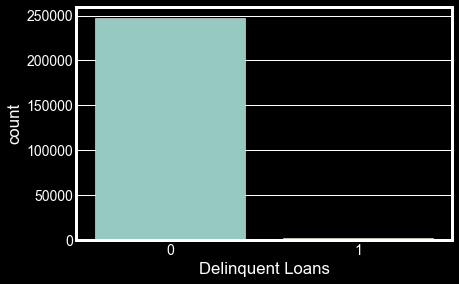

In [122]:
# View amount of loans that were delinquent.
print('How many loans resulted in delinquent status?\n',
      df['dlq'].value_counts())
print('\nWhat % of loans were delinquent?\n',
      df['dlq'].value_counts(normalize=True))

# Set Aesthetics.
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
g = sns.countplot(x='dlq', data=df)
g.set_xlabel('Delinquent Loans')
plt.show()

As previously seen, the amount of loans that ended up not being paid on time represents about 1.1% of the dataset & we can conclude the dataset is highly imbalanced.

### Probability Density Function

In [243]:
# Creating variables for plotting.
mean_credit_score = df['credit_score'].mean()
mean_int_rate = df['int_rate'].mean()
mean_ltv_ratio = df['ltv_ratio'].mean()
mean_dti_ratio = df['dti_ratio'].mean()
mean_cltv_ratio = df['cltv_ratio'].mean()
mean_upb = df['unpaid_princ_bal'].mean()
mean_mi = df['mortgage_insurance_pctg'].mean()

std_credit_score = df['credit_score'].std()
std_int_rate = df['int_rate'].std()
std_ltv_ratio = df['ltv_ratio'].std()
std_dti_ratio = df['dti_ratio'].std()
std_cltv_ratio = df['cltv_ratio'].std()
std_upb = df['unpaid_princ_bal'].std()
std_mi = df['mortgage_insurance_pctg'].std()

Text(0,0.5,'')

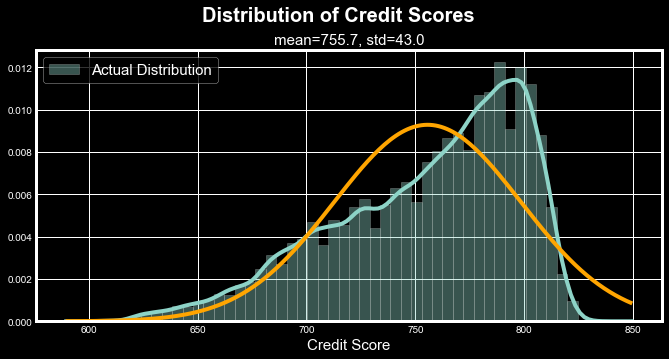

In [234]:
# Set aesthetics.
plt.style.use('dark_background')
f, ax = plt.subplots(ncols=1, figsize=(10, 5))
f.suptitle('Distribution of Credit Scores', weight='bold', size=20, y=1)
ax.set_title('mean=%.1f, std=%.1f'%(mean_credit_score, std_credit_score), size=15)

# Distplot.
sns.distplot(df['credit_score'], fit_kws={'color':'orange'},
             kde=True, fit=norm, label='Actual Distribution')

# Legend.
ax.legend(loc='best', prop={'size':15})

ax.set_xlabel('Credit Score', size=15)
ax.set_ylabel('')

Text(0,0.5,'')

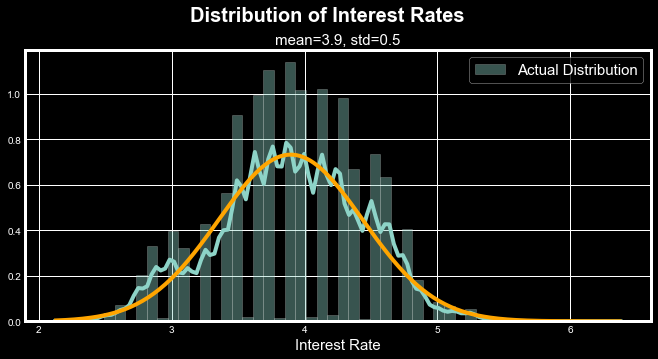

In [242]:
# Set aesthetics.
plt.style.use('dark_background')
f, ax = plt.subplots(ncols=1, figsize=(10, 5))
f.suptitle('Distribution of Interest Rates', weight='bold', size=20, y=1)
ax.set_title('mean=%.1f, std=%.1f'%(mean_int_rate, std_int_rate), size=15)

# Distplot.
sns.distplot(df['int_rate'], fit_kws={'color':'orange'},
             kde=True, fit=norm, label='Actual Distribution')

# Legend.
ax.legend(loc='best', prop={'size':15})

ax.set_xlabel('Interest Rate', size=15)
ax.set_ylabel('')

Text(0,0.5,'')

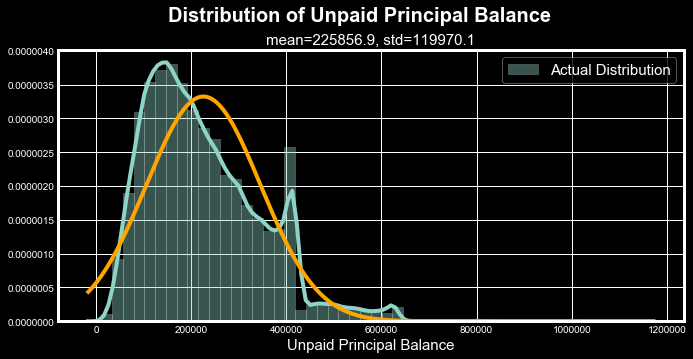

In [244]:
# Set aesthetics.
plt.style.use('dark_background')
f, ax = plt.subplots(ncols=1, figsize=(10, 5))
f.suptitle('Distribution of Unpaid Principal Balance', weight='bold', size=20, y=1)
ax.set_title('mean=%.1f, std=%.1f'%(mean_upb, std_upb), size=15)

# Distplot.
sns.distplot(df['unpaid_princ_bal'], fit_kws={'color':'orange'},
             kde=True, fit=norm, label='Actual Distribution')

# Legend.
ax.legend(loc='best', prop={'size':15})

ax.set_xlabel('Unpaid Principal Balance', size=15)
ax.set_ylabel('')

Text(0,0.5,'UPB')

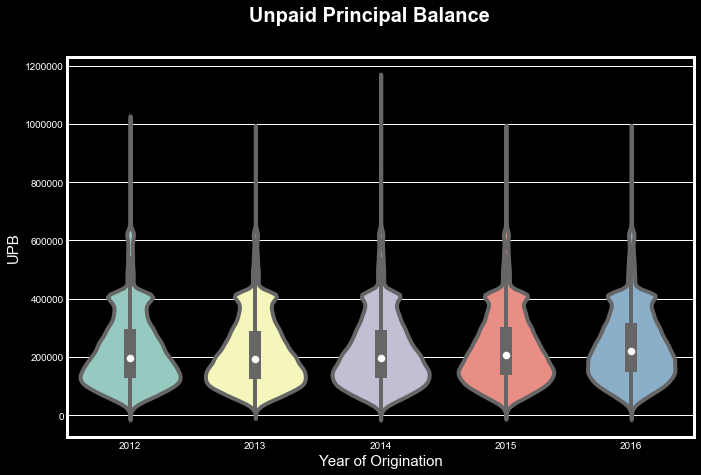

In [256]:
# Look at outliers for upb.
f, ax = plt.subplots(1, 1, figsize=(10, 7))
f.suptitle('Unpaid Principal Balance', fontsize=20, weight='bold')
sns.violinplot(data=df, x='year', y='unpaid_princ_bal', ax=ax)
ax.set_xlabel('Year of Origination', size=15)
ax.set_ylabel('UPB', size=15)

Text(0,0.5,'Count')

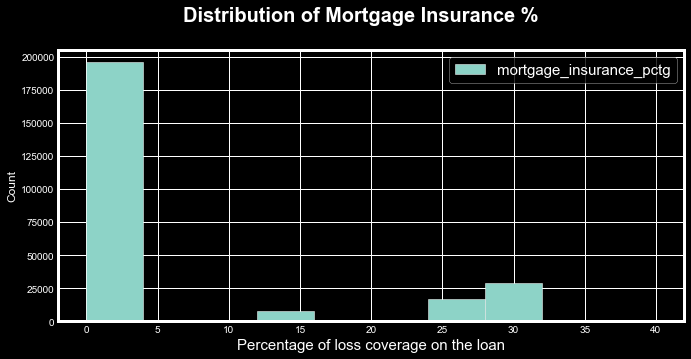

In [268]:
# Set aesthetics.
plt.style.use('dark_background')
f, ax = plt.subplots(ncols=1, figsize=(10, 5))
f.suptitle('Distribution of Mortgage Insurance %', weight='bold', size=20, y=1)

# Distplot.
ax.hist(df['mortgage_insurance_pctg'])

# Legend.
ax.legend(loc='best', prop={'size':15})

ax.set_xlabel('Percentage of loss coverage on the loan', size=15)
ax.set_ylabel('Count')

No handles with labels found to put in legend.


[Text(0,0,'4.0'),
 Text(0,0,'4.0'),
 Text(0,0,'4.5'),
 Text(0,0,'4.0'),
 Text(0,0,'4.25'),
 Text(0,0,'4.125'),
 Text(0,0,'4.375')]

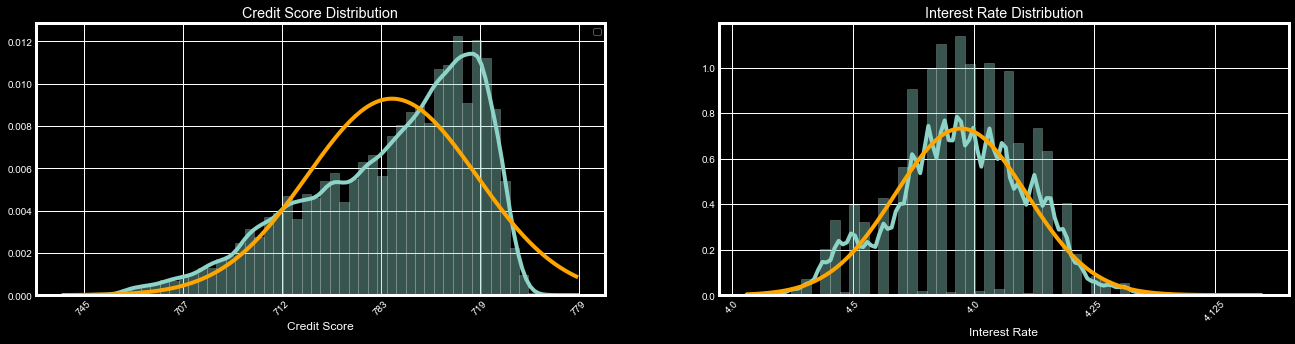

In [191]:
## ltv_ratio
## dti_ratio
## cltv_ratio



f, axes = plt.subplots(ncols=2, figsize=(20, 5))
# Distributions.
sns.distplot(df['credit_score'], fit_kws={'color':'orange'}, kde=True, ax=axes[0], fit=norm).set_title('Credit Score Distribution')
axes[0].set_xlabel('Credit Score')
axes[0].set_xticklabels(df['credit_score'], rotation=45)
#axes[0].xaxis.label.set_color('orange')
axes[0].legend(loc='best', prop={'size':9})
sns.distplot(df['int_rate'], fit_kws={'color':'orange'}, kde=True, ax=axes[1], fit=norm).set_title('Interest Rate Distribution')
axes[1].set_xlabel('Interest Rate')
axes[1].set_xticklabels(df['int_rate'], rotation=45)

#### DO A SCATTERPLOT WITH CONTINUOUS HUES AND SIZES
[link](http://seaborn.pydata.org/examples/scatterplot_sizes.html)

#### DO PIE CHARTS FOR CATEGORICAL VARS, SUBPLOTS 

## First view of financial features

1. credit score
2. interest rate
3. upb

Ratios: <br>
LTV <br>
DTI <br>
CLTV <br>
MI % <br>

## First view of qualitative features

## Time Series

## T-Tests

## Log trans, scaling AND/OR standardizing all numerical values

## Check for co-linearity

## Model Prep

## Feature Engineering

## Correlation

## Assigning X and Y

## PCA

## Models

## Results

## Conclusion

## Future Research and Analysis